In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes_20251210.csv')
df_people = pd.read_csv('Traffic_Crashes_-_People_20251210.csv')
df_vehicles = pd.read_csv('Traffic_Crashes_-_Crashes_20251210.csv')

C:\Users\muhan\AppData\Local\Temp\ipykernel_24120\4218128439.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes_20251210.csv')
C:\Users\muhan\AppData\Local\Temp\ipykernel_24120\4218128439.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_people = pd.read_csv('Traffic_Crashes_-_People_20251210.csv')
C:\Users\muhan\AppData\Local\Temp\ipykernel_24120\4218128439.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicles = pd.read_csv('Traffic_Crashes_-_Crashes_20251210.csv')


In [3]:
d1 = df_crashes['CRASH_RECORD_ID'].unique()
d2 = df_people['CRASH_RECORD_ID'].unique()
d3 = df_vehicles['CRASH_RECORD_ID'].unique()
if len(d1) == len(d2) and len(d1) == len(d3):
    print("The number of records in all three dataframes is the same.")
else:
    print("The number of records in the dataframes is not the same.")
    print(f"Crashes: {len(d1)}, People: {len(d2)}, Vehicles: {len(d3)}")

The number of records in the dataframes is not the same.
Crashes: 1009729, People: 1007544, Vehicles: 1009729


In [4]:
d1_d2 = set(d1) - set(d2)
d1_d3 = set(d1) - set(d3)
d2_d3 = set(d2) - set(d3)
print(f"Records in crashes but not in people: {len(d1_d2)}")
print(f"Records in crashes but not in vehicles: {len(d1_d3)}")
print(f"Records in people but not in vehicles: {len(d2_d3)}")



Records in crashes but not in people: 2185
Records in crashes but not in vehicles: 0
Records in people but not in vehicles: 0


In [5]:
#remove the records that are not in people
df_crashes = df_crashes[df_crashes['CRASH_RECORD_ID'].isin(d2)]
df_vehicles = df_vehicles[df_vehicles['CRASH_RECORD_ID'].isin(d2)]

#Make sure
d1 = df_crashes['CRASH_RECORD_ID'].unique()
d3 = df_vehicles['CRASH_RECORD_ID'].unique()

d1_d2 = set(d1) - set(d2)
d1_d3 = set(d1) - set(d3)
d2_d3 = set(d2) - set(d3)
print(f"Records in crashes but not in people: {len(d1_d2)}")
print(f"Records in crashes but not in vehicles: {len(d1_d3)}")
print(f"Records in people but not in vehicles: {len(d2_d3)}")

Records in crashes but not in people: 0
Records in crashes but not in vehicles: 0
Records in people but not in vehicles: 0


In [6]:
total_values = df_crashes.size  
missing_values = df_crashes.isnull().sum().sum()
missing_ratio = (missing_values / total_values) * 100

print(missing_ratio)

21.136975986491244


In [7]:
total_values = df_people.size  
missing_values = df_people.isnull().sum().sum()
missing_ratio = (missing_values / total_values) * 100

print(missing_ratio)

39.42137566904591


In [8]:
total_values = df_vehicles.size  
missing_values = df_vehicles.isnull().sum().sum()
missing_ratio = (missing_values / total_values) * 100

print(missing_ratio)

21.136975986491244


Now we can merge!

In [9]:



# Defining columns we need in each column
COLS = {
    'CRASHES': [
        'CRASH_RECORD_ID', 'MOST_SEVERE_INJURY', 'POSTED_SPEED_LIMIT',
        'WEATHER_CONDITION', 'ROADWAY_SURFACE_COND', 'CRASH_HOUR','CRASH_DAY_OF_WEEK',
        'LATITUDE', 'LONGITUDE'
    ],
    'PEOPLE': [
        'CRASH_RECORD_ID', 'AGE', 'BAC_RESULT VALUE'
    ],
    'VEHICLES': [
        'CRASH_RECORD_ID', 'VEHICLE_TYPE', 'EXCEED_SPEED_LIMIT_I'
    ]
}

# Load and merge the data
df = (
    pd.read_csv('Traffic_Crashes_-_Crashes_20251210.csv', usecols=COLS['CRASHES'])
    .merge(pd.read_csv('Traffic_Crashes_-_People_20251210.csv', low_memory=False, usecols=COLS['PEOPLE']), on='CRASH_RECORD_ID')
    .merge(pd.read_csv('Traffic_Crashes_-_Vehicles_20251210.csv', low_memory=False, usecols=COLS['VEHICLES']), on='CRASH_RECORD_ID')
)


In [10]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651160 entries, 0 to 4651159
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   CRASH_RECORD_ID       object 
 1   POSTED_SPEED_LIMIT    int64  
 2   WEATHER_CONDITION     object 
 3   ROADWAY_SURFACE_COND  object 
 4   MOST_SEVERE_INJURY    object 
 5   CRASH_HOUR            int64  
 6   CRASH_DAY_OF_WEEK     int64  
 7   LATITUDE              float64
 8   LONGITUDE             float64
 9   AGE                   float64
 10  BAC_RESULT VALUE      float64
 11  VEHICLE_TYPE          object 
 12  EXCEED_SPEED_LIMIT_I  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 461.3+ MB


None

In [11]:
df.notna().sum()[df.notna().sum()<4339058].sort_values(ascending=False)

AGE                     3310649
EXCEED_SPEED_LIMIT_I       6130
BAC_RESULT VALUE           5683
dtype: int64

In [12]:
df.drop(columns=['EXCEED_SPEED_LIMIT_I','BAC_RESULT VALUE'], inplace=True)

In [13]:
df.notna().sum()[df.notna().sum()<4339058].sort_values(ascending=False)

AGE    3310649
dtype: int64

In [14]:
# Since we already have too much data, we can drop rows with missing values in the columns we are interested in
df = df.dropna(subset=['MOST_SEVERE_INJURY','LATITUDE','LONGITUDE','VEHICLE_TYPE', 'AGE'])
df.notna().sum()[df.notna().sum()<4339058].sort_values(ascending=False)

CRASH_RECORD_ID         3200215
POSTED_SPEED_LIMIT      3200215
WEATHER_CONDITION       3200215
ROADWAY_SURFACE_COND    3200215
MOST_SEVERE_INJURY      3200215
CRASH_HOUR              3200215
CRASH_DAY_OF_WEEK       3200215
LATITUDE                3200215
LONGITUDE               3200215
AGE                     3200215
VEHICLE_TYPE            3200215
dtype: int64

In [15]:
display(df['POSTED_SPEED_LIMIT'].value_counts())
display(df['WEATHER_CONDITION'].value_counts())
display(df['ROADWAY_SURFACE_COND'].value_counts())
display(df['CRASH_HOUR'].value_counts())
display(df['CRASH_DAY_OF_WEEK'].value_counts())
display(df['VEHICLE_TYPE'].value_counts())
display(df['MOST_SEVERE_INJURY'].value_counts())



POSTED_SPEED_LIMIT
30    2478117
35     231436
25     178023
20      93759
15      71064
10      45701
40      40815
45      24997
0       19334
5       10438
55       2942
50       1096
3         824
39        320
9         242
99        208
60        194
24         89
1          82
32         61
34         58
65         56
26         54
2          52
33         48
6          28
36         26
11         26
31         16
12         16
7          16
14         12
70         11
22          8
29          8
23          7
8           6
18          4
63          4
44          4
38          4
4           4
62          2
16          1
46          1
49          1
Name: count, dtype: int64

WEATHER_CONDITION
CLEAR                       2561291
RAIN                         297244
UNKNOWN                      109702
CLOUDY/OVERCAST              103711
SNOW                          99369
OTHER                         10422
FREEZING RAIN/DRIZZLE          7549
FOG/SMOKE/HAZE                 4785
SLEET/HAIL                     3899
BLOWING SNOW                   1723
SEVERE CROSS WIND GATE          440
BLOWING SAND, SOIL, DIRT         80
Name: count, dtype: int64

ROADWAY_SURFACE_COND
DRY                2408630
WET                 450813
UNKNOWN             217601
SNOW OR SLUSH        93439
ICE                  21360
OTHER                 7685
SAND, MUD, DIRT        687
Name: count, dtype: int64

CRASH_HOUR
16    269378
15    268554
17    260788
14    220595
18    208375
13    197279
12    187244
8     175049
11    162281
19    148178
10    140805
7     140610
9     140155
20    115497
21    103081
22     91236
23     76282
6      59610
0      58375
1      48253
2      39862
5      32895
3      29963
4      25870
Name: count, dtype: int64

CRASH_DAY_OF_WEEK
6    528069
7    477057
5    464680
3    456255
4    455919
2    429838
1    388397
Name: count, dtype: int64

VEHICLE_TYPE
PASSENGER                                 2118570
SPORT UTILITY VEHICLE (SUV)                490028
VAN/MINI-VAN                               155883
UNKNOWN/NA                                 124397
PICKUP                                     109028
TRUCK - SINGLE UNIT                         56859
BUS OVER 15 PASS.                           44266
OTHER                                       38217
TRACTOR W/ SEMI-TRAILER                     29223
BUS UP TO 15 PASS.                           9860
MOTORCYCLE (OVER 150CC)                      7957
SINGLE UNIT TRUCK WITH TRAILER               4603
OTHER VEHICLE WITH TRAILER                   4346
TRACTOR W/O SEMI-TRAILER                     4152
MOPED OR MOTORIZED BICYCLE                   1233
AUTOCYCLE                                     497
MOTOR DRIVEN CYCLE                            470
ALL-TERRAIN VEHICLE (ATV)                     301
FARM EQUIPMENT                                157
3-WHEELED MOTORCYCLE (2 REAR WHEELS) 

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     2533046
NONINCAPACITATING INJURY     363086
REPORTED, NOT EVIDENT        224125
INCAPACITATING INJURY         74827
FATAL                          5131
Name: count, dtype: int64

In [16]:
df = df[df['ROADWAY_SURFACE_COND'] != 'UNKNOWN']
df = df[df['ROADWAY_SURFACE_COND'] != 'OTHER']
df = df[df['WEATHER_CONDITION'] != 'UNKNOWN']
df = df[df['WEATHER_CONDITION'] != 'OTHER']
df = df[df['VEHICLE_TYPE'] != 'UNKNOWN/NA']
df = df[df['VEHICLE_TYPE'] != 'OTHER']

display(df['ROADWAY_SURFACE_COND'].value_counts())
display(df['WEATHER_CONDITION'].value_counts())
display(df['VEHICLE_TYPE'].value_counts())

ROADWAY_SURFACE_COND
DRY                2290086
WET                 423663
SNOW OR SLUSH        87592
ICE                  18900
SAND, MUD, DIRT        621
Name: count, dtype: int64

WEATHER_CONDITION
CLEAR                       2339807
RAIN                         280157
SNOW                          93226
CLOUDY/OVERCAST               90779
FREEZING RAIN/DRIZZLE          6962
FOG/SMOKE/HAZE                 4234
SLEET/HAIL                     3641
BLOWING SNOW                   1605
SEVERE CROSS WIND GATE          393
BLOWING SAND, SOIL, DIRT         58
Name: count, dtype: int64

VEHICLE_TYPE
PASSENGER                                 1971846
SPORT UTILITY VEHICLE (SUV)                445882
VAN/MINI-VAN                               145446
PICKUP                                     101554
TRUCK - SINGLE UNIT                         53678
BUS OVER 15 PASS.                           42738
TRACTOR W/ SEMI-TRAILER                     28006
BUS UP TO 15 PASS.                           9290
MOTORCYCLE (OVER 150CC)                      7550
SINGLE UNIT TRUCK WITH TRAILER               4267
OTHER VEHICLE WITH TRAILER                   4003
TRACTOR W/O SEMI-TRAILER                     3966
MOPED OR MOTORIZED BICYCLE                   1144
AUTOCYCLE                                     456
MOTOR DRIVEN CYCLE                            441
ALL-TERRAIN VEHICLE (ATV)                     282
FARM EQUIPMENT                                155
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          109
RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)         45
SNOWMOBILE                           

In [17]:
#handle duplicates
display(df.duplicated().sum(),'/', df.shape[0])

np.int64(910850)

'/'

2820862

In [18]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum(),'/', df.shape[0])

0 / 1910012


In [19]:
print(df[['CRASH_RECORD_ID']].duplicated().sum())
print(df[['CRASH_RECORD_ID']].nunique().sum())


1168607
741405


In [20]:
# remove duplicated crash records
df.drop_duplicates(subset=['CRASH_RECORD_ID'], inplace=True)
print(df[['CRASH_RECORD_ID']].duplicated().sum())

0


preparing the constructed binary target variable from 'MOST_SEVERE_INJURY

In [21]:
df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     612884
NONINCAPACITATING INJURY     71799
REPORTED, NOT EVIDENT        41181
INCAPACITATING INJURY        14636
FATAL                          905
Name: count, dtype: int64

In [22]:
# Create the binary label column
df['SEVERE_ACCIDENT'] = np.where(
    df['MOST_SEVERE_INJURY'].isin(['INCAPACITATING INJURY', 'FATAL']),
    1,  # (serious accident)
    0   # (no serious accident)
)

# Verify the class distribution
print(df['SEVERE_ACCIDENT'].value_counts())
print(f"\nClass ratio: {len(df[df['SEVERE_ACCIDENT']==0])/len(df[df['SEVERE_ACCIDENT']==1]):.1f}:1")

SEVERE_ACCIDENT
0    725864
1     15541
Name: count, dtype: int64

Class ratio: 46.7:1


High unbalanced class labe, we need to consider balancing in the model

FEATURES Engeneering:
 1- POSTED_SPEED_LIMIT engeneering:


In [23]:
display(df['POSTED_SPEED_LIMIT'].value_counts())

POSTED_SPEED_LIMIT
30    563850
35     52016
25     44073
20     24944
15     20609
10     12909
40      8139
45      5293
0       4967
5       3109
55       669
50       254
3        193
39        75
9         74
60        40
24        23
1         18
2         16
32        16
34        14
65        13
99        12
33        11
26        10
11         7
6          6
70         5
14         5
7          5
36         5
12         3
23         3
31         3
22         2
18         2
29         2
38         2
4          2
16         1
8          1
44         1
62         1
63         1
49         1
Name: count, dtype: int64

In [24]:
    # remove the outliers
df = df[df['POSTED_SPEED_LIMIT'] != 0]
df = df[df['POSTED_SPEED_LIMIT'] != 99]
    
# Create bins
bins = [0, 15, 25, 35, 45, 55, 65, 75]
labels = ['0-15', '15-25', '25-35', '35-45', '45-55', '55-65', '65+']
df['SPEED_LIMIT_BINNED'] = pd.cut(df['POSTED_SPEED_LIMIT'], bins=bins, labels=labels, right=False)

print(df['SPEED_LIMIT_BINNED'].value_counts())


SPEED_LIMIT_BINNED
25-35    607979
35-45     60238
15-25     45584
0-15      16348
45-55      5548
55-65       711
65+          18
Name: count, dtype: int64


In [25]:
# Improved binning strategy
bins = [0, 20, 30, 40, 50, 70]  # More natural breakpoints
labels = ['0-20', '21-30', '31-40', '41-50', '50+'] 

df['SPEED_LIMIT_BINNED'] = pd.cut(df['POSTED_SPEED_LIMIT'], bins=bins, labels=labels, right=False )

# Verify new distribution
print(df['SPEED_LIMIT_BINNED'].value_counts().sort_index())

SPEED_LIMIT_BINNED
0-20      36960
21-30     69057
31-40    615992
41-50     13434
50+         978
Name: count, dtype: int64


In [26]:
# Ordinal encoding preserving risk hierarchy
speed_map = {'0-20':0, '21-30':1, '31-40':2, '41-50':3, '50+':4}
df['SPEED_ORDINAL'] = df['SPEED_LIMIT_BINNED'].map(speed_map)

print(df['SPEED_ORDINAL'].value_counts().sort_index())

SPEED_ORDINAL
0     36960
1     69057
2    615992
3     13434
4       978
Name: count, dtype: int64


FEATURES Engeneering:
 1- POSTED_SPEED_LIMIT (output: 'SPEED_ORDINAL')
 2- WEATHER_CONDITION:

In [27]:
# weather condition engineering
display(df['WEATHER_CONDITION'].value_counts())

WEATHER_CONDITION
CLEAR                       612798
RAIN                         71466
SNOW                         25177
CLOUDY/OVERCAST              22549
FREEZING RAIN/DRIZZLE         1865
FOG/SMOKE/HAZE                1095
SLEET/HAIL                     946
BLOWING SNOW                   415
SEVERE CROSS WIND GATE         100
BLOWING SAND, SOIL, DIRT        15
Name: count, dtype: int64

There are low-frequency conditions, we wil do consilidation

In [28]:
# Group low-frequency conditions
weather_map = {
    'CLEAR': 'CLEAR',
    'RAIN': 'RAIN',
    'SNOW': 'SNOW',
    'CLOUDY/OVERCAST': 'CLOUDY',
    'FREEZING RAIN/DRIZZLE': 'WINTER_MIX',
    'FOG/SMOKE/HAZE': 'LOW_VISIBILITY',
    'SLEET/HAIL': 'WINTER_MIX',
    'BLOWING SNOW': 'WINTER_MIX',
    'SEVERE CROSS WIND GATE': 'HIGH_WIND',
    'BLOWING SAND, SOIL, DIRT': 'HIGH_WIND'
}

df['WEATHER_CONDITION'] = df['WEATHER_CONDITION'].map(weather_map)

# Verify new distribution
print(df['WEATHER_CONDITION'].value_counts())

WEATHER_CONDITION
CLEAR             612798
RAIN               71466
SNOW               25177
CLOUDY             22549
WINTER_MIX          3226
LOW_VISIBILITY      1095
HIGH_WIND            115
Name: count, dtype: int64


In [29]:
# Calculate severe accident rate per weather type
weather_risk = df.groupby('WEATHER_CONDITION')['SEVERE_ACCIDENT'].mean().sort_values(ascending=False)

print(weather_risk.round(4))

WEATHER_CONDITION
LOW_VISIBILITY    0.0228
RAIN              0.0224
CLEAR             0.0212
WINTER_MIX        0.0211
CLOUDY            0.0200
HIGH_WIND         0.0174
SNOW              0.0143
Name: SEVERE_ACCIDENT, dtype: float64


Key Problems:
Base Rate Fallacy: Even with low relative risk, CLEAR weather dominates accident counts because it's so common.

Missing Interactions: Weather likely combines with other factors (e.g., speed, road type) to drive risk.

Data Limitations: Rare conditions (HIGH_WIND) may not have enough samples to show true risk.

In [30]:
# Example: Accident rate for RAIN in high-speed zones (>45 mph)
rain_highspeed_rate = df[
    (df['WEATHER_CONDITION'] == 'RAIN') & 
    (df['SPEED_ORDINAL'] >= 3)  # Your speed bins
]['SEVERE_ACCIDENT'].mean()

clrearOrcloud_highspeed_rate = df[
    (df['WEATHER_CONDITION'].isin(['CLEAR', 'CLOUDY'])) & 
    (df['SPEED_ORDINAL'] >= 3)  # Your speed bins
]['SEVERE_ACCIDENT'].mean()

print(f"Severe accident rate for RAIN in high-speed zones: {rain_highspeed_rate:.1%}")
print(f"Severe accident rate for CLEAR or CLOUDY in high-speed zones: {clrearOrcloud_highspeed_rate:.1%}")

Severe accident rate for RAIN in high-speed zones: 2.7%
Severe accident rate for CLEAR or CLOUDY in high-speed zones: 3.8%


In [31]:
# Feature 1: High-speed clear/cloudy (highest risk)
df['HIGH_SPEED_DRY'] = (
    (df['WEATHER_CONDITION'].isin(['CLEAR', 'CLOUDY'])) & 
    (df['SPEED_ORDINAL'] >= 3)  # Your high-speed threshold
).astype(int)

# Feature 2: High-speed rain (paradoxically safer)
df['HIGH_SPEED_RAIN'] = (
    (df['WEATHER_CONDITION'] == 'RAIN') & 
    (df['SPEED_ORDINAL'] >= 3)
).astype(int)

# Verify risk rates
print(
    "HIGH_SPEED_DRY accident rate:", 
    df[df['HIGH_SPEED_DRY'] == 1]['SEVERE_ACCIDENT'].mean().round(3)
)
print(
    "HIGH_SPEED_RAIN accident rate:", 
    df[df['HIGH_SPEED_RAIN'] == 1]['SEVERE_ACCIDENT'].mean().round(3)
)

HIGH_SPEED_DRY accident rate: 0.038
HIGH_SPEED_RAIN accident rate: 0.027


FEATURES Engeneering:
 1- POSTED_SPEED_LIMIT (constructed: 'SPEED_ORDINAL') DONE✔️
 2- WEATHER_CONDITION ALMOST ✔️
 3- ROADWAY_SURFACE_COND:

In [32]:
# serface condition engineering
display(df['ROADWAY_SURFACE_COND'].value_counts())


ROADWAY_SURFACE_COND
DRY                599639
WET                107310
SNOW OR SLUSH       24160
ICE                  5076
SAND, MUD, DIRT       241
Name: count, dtype: int64

In [33]:
# CHECK THAT DATA IS CONSISTENT WITH THE WEATHER CONDITION
display(df[df['WEATHER_CONDITION'] == 'CLOUDY']['ROADWAY_SURFACE_COND'].value_counts())
display(df[df['WEATHER_CONDITION'] == 'RAIN']['ROADWAY_SURFACE_COND'].value_counts())
display(df[df['WEATHER_CONDITION'] == 'SNOW']['ROADWAY_SURFACE_COND'].value_counts())


ROADWAY_SURFACE_COND
DRY                15087
WET                 6656
SNOW OR SLUSH        562
ICE                  231
SAND, MUD, DIRT       13
Name: count, dtype: int64

ROADWAY_SURFACE_COND
WET                68696
DRY                 2344
SNOW OR SLUSH        299
ICE                  115
SAND, MUD, DIRT       12
Name: count, dtype: int64

ROADWAY_SURFACE_COND
SNOW OR SLUSH      16801
WET                 6587
ICE                 1286
DRY                  499
SAND, MUD, DIRT        4
Name: count, dtype: int64

We found the solution!
since we have a feature for street condition and a feature for wather condition. we will construct these two binary classes from them.
- STREET_SOFT from street condition.
- VESIBILITY from weather. 
so we get independent two attributes

In [34]:
# Binary flag for soft/dangerous road surfaces
df['STREET_SOFT'] = df['ROADWAY_SURFACE_COND'].isin([
    'WET', 
    'SNOW OR SLUSH', 
    'ICE', 
    'SAND, MUD, DIRT'
]).astype(int)

# Verify
print("STREET_SOFT Distribution:")
print(df['STREET_SOFT'].value_counts())
print("\nSevere Accident Rate:")
print(df.groupby('STREET_SOFT')['SEVERE_ACCIDENT'].mean())

STREET_SOFT Distribution:
STREET_SOFT
0    599639
1    136787
Name: count, dtype: int64

Severe Accident Rate:
STREET_SOFT
0    0.021178
1    0.020375
Name: SEVERE_ACCIDENT, dtype: float64


In [35]:
# # Target ONLY extreme surface conditions
# df['STREET_EXTREME'] = df['ROADWAY_SURFACE_COND'].isin([
#     'ICE', 
#     'SNOW OR SLUSH'
# ]).astype(int)

# # Check new rates
# print("STREET_EXTREME Distribution:")
# print(df['STREET_EXTREME'].value_counts())
# print(df.groupby('STREET_EXTREME')['SEVERE_ACCIDENT'].mean())

Even worse results!
we will stay on STREET_SOFT

In [36]:
# Binary flag for poor visibility conditions
df['NO_VISIBILITY'] = df['WEATHER_CONDITION'].isin([
    'RAIN', 
    'SNOW', 
    'FOG/SMOKE/HAZE', 
    'FREEZING RAIN/DRIZZLE'
]).astype(int)

# Verify
print("\nVISIBILITY Distribution:")
print(df['NO_VISIBILITY'].value_counts())
print("\nSevere Accident Rate:")
print(df.groupby('NO_VISIBILITY')['SEVERE_ACCIDENT'].mean())


VISIBILITY Distribution:
NO_VISIBILITY
0    639783
1     96643
Name: count, dtype: int64

Severe Accident Rate:
NO_VISIBILITY
0    0.021145
1    0.020260
Name: SEVERE_ACCIDENT, dtype: float64


FEATURES Engeneering:
 1- POSTED_SPEED_LIMIT. constructed features: ('SPEED_ORDINAL') DONE✔️
 2- WEATHER_CONDITION. constructed features: ('NO_VISIBILITY') Done✔️
 3- ROADWAY_SURFACE_COND. constructed features: ('STREET_SOFT') Done✔️
 4- CRASH_HOUR & CRASH_DAY_OF_WEEK are good as seen at beginning.
 5- 'VEHICLE_TPYPE':

In [37]:
display(df['VEHICLE_TYPE'].value_counts())  

VEHICLE_TYPE
PASSENGER                                 502948
SPORT UTILITY VEHICLE (SUV)               113110
VAN/MINI-VAN                               40161
PICKUP                                     29991
TRUCK - SINGLE UNIT                        19861
TRACTOR W/ SEMI-TRAILER                    10814
BUS OVER 15 PASS.                           9713
BUS UP TO 15 PASS.                          2582
MOTORCYCLE (OVER 150CC)                     2161
SINGLE UNIT TRUCK WITH TRAILER              1667
TRACTOR W/O SEMI-TRAILER                    1187
OTHER VEHICLE WITH TRAILER                  1169
MOPED OR MOTORIZED BICYCLE                   443
AUTOCYCLE                                    230
MOTOR DRIVEN CYCLE                           149
ALL-TERRAIN VEHICLE (ATV)                    123
FARM EQUIPMENT                                51
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          45
RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)        18
SNOWMOBILE                                     3
Name: c

In [38]:
vehicle_map = {
    # Core passenger vehicles
    'PASSENGER': 'PASSENGER_CAR',
    'SPORT UTILITY VEHICLE (SUV)': 'SUV',
    'VAN/MINI-VAN': 'VAN',
    
    # Commercial/heavy vehicles
    'PICKUP': 'PICKUP',
    'TRUCK - SINGLE UNIT': 'TRUCK',
    'TRACTOR W/ SEMI-TRAILER': 'SEMI_TRUCK',
    'SINGLE UNIT TRUCK WITH TRAILER': 'TRUCK_W_TRAILER',
    
    # Buses
    'BUS OVER 15 PASS.': 'LARGE_BUS',
    'BUS UP TO 15 PASS.': 'SMALL_BUS',
    
    # Vulnerable road users
    'MOTORCYCLE (OVER 150CC)': 'MOTORCYCLE',
    'MOPED OR MOTORIZED BICYCLE': 'MOTORCYCLE',
    'AUTOCYCLE': 'MOTORCYCLE',
    '3-WHEELED MOTORCYCLE (2 REAR WHEELS)': 'MOTORCYCLE',
    
    # Specialized (grouped)
    'OTHER VEHICLE WITH TRAILER': 'SPECIALIZED',
    'TRACTOR W/O SEMI-TRAILER': 'SPECIALIZED', 
    'ALL-TERRAIN VEHICLE (ATV)': 'SPECIALIZED',
    'FARM EQUIPMENT': 'SPECIALIZED',
    'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)': 'SPECIALIZED',
    'MOTOR DRIVEN CYCLE': 'SPECIALIZED',
    'SNOWMOBILE': 'SPECIALIZED'
}

df['VEHICLE_GROUP'] = df['VEHICLE_TYPE'].map(vehicle_map).astype('category')
# Verify new distribution
print("\nVEHICLE_GROUP Distribution:")
print(df['VEHICLE_GROUP'].value_counts())

print("\nSevere Accident Rate by Vehicle Group:")
print(df.groupby('VEHICLE_GROUP')['SEVERE_ACCIDENT'].mean().round(4).sort_values(ascending=False))


VEHICLE_GROUP Distribution:
VEHICLE_GROUP
PASSENGER_CAR      502948
SUV                113110
VAN                 40161
PICKUP              29991
TRUCK               19861
SEMI_TRUCK          10814
LARGE_BUS            9713
MOTORCYCLE           2879
SPECIALIZED          2700
SMALL_BUS            2582
TRUCK_W_TRAILER      1667
Name: count, dtype: int64

Severe Accident Rate by Vehicle Group:
VEHICLE_GROUP
MOTORCYCLE         0.1771
SPECIALIZED        0.0244
PASSENGER_CAR      0.0217
SUV                0.0194
PICKUP             0.0194
VAN                0.0188
LARGE_BUS          0.0121
TRUCK              0.0113
TRUCK_W_TRAILER    0.0096
SEMI_TRUCK         0.0076
SMALL_BUS          0.0062
Name: SEVERE_ACCIDENT, dtype: float64


C:\Users\muhan\AppData\Local\Temp\ipykernel_24120\1222374680.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('VEHICLE_GROUP')['SEVERE_ACCIDENT'].mean().round(4).sort_values(ascending=False))


surprising patterns:
  - Motorcycles (17.9% severe rate) are correctly high-risk
  - Semi-trucks (0.74%) show lower severity than passenger cars (2.19%) - likely due to:
    - Professional drivers
    - Underreporting of truck-involved severe crashes
    - Survivorship bias (severe truck crashes may be fatal and excluded)

In [39]:
# Regrouping vehicle types based on severe accident rates

vehicle_group_map = {
    # High-risk groups (keep separate)
    'MOTORCYCLE': 'MOTORCYCLE',          # 17.9% severe rate
    'SPECIALIZED': 'SPECIALIZED',         # 2.53% (investigate further)
    
    # Passenger vehicles (similar risk profiles)
    'PASSENGER_CAR': 'PASSENGER',        # 2.19%
    'SUV': 'PASSENGER',                  # 1.94%
    'VAN': 'PASSENGER',                  # 1.90%
    'PICKUP': 'PASSENGER',               # 2.00%
    
    # Commercial vehicles (low risk, merge)
    'TRUCK': 'COMMERCIAL',               # 1.12%
    'SEMI_TRUCK': 'COMMERCIAL',          # 0.74%
    'TRUCK_W_TRAILER': 'COMMERCIAL',     # 0.99%
    'LARGE_BUS': 'COMMERCIAL',           # 1.29%
    'SMALL_BUS': 'COMMERCIAL'            # 0.68%
}

df['VEHICLE_GROUP'] = df['VEHICLE_GROUP'].map(vehicle_group_map).astype('category')

In [40]:
# Verify new distribution
print("Updated Distribution:")
print(df['VEHICLE_GROUP'].value_counts())

print("\nSevere Accident Rates:")
print(df.groupby('VEHICLE_GROUP')['SEVERE_ACCIDENT'].mean().sort_values(ascending=False))

Updated Distribution:
VEHICLE_GROUP
PASSENGER      686210
COMMERCIAL      44637
MOTORCYCLE       2879
SPECIALIZED      2700
Name: count, dtype: int64

Severe Accident Rates:
VEHICLE_GROUP
MOTORCYCLE     0.177145
SPECIALIZED    0.024444
PASSENGER      0.021062
COMMERCIAL     0.010238
Name: SEVERE_ACCIDENT, dtype: float64


C:\Users\muhan\AppData\Local\Temp\ipykernel_24120\1036185487.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('VEHICLE_GROUP')['SEVERE_ACCIDENT'].mean().sort_values(ascending=False))


FEATURES Engeneering:
 1- POSTED_SPEED_LIMIT. constructed features: ('SPEED_ORDINAL') DONE✔️

 2- WEATHER_CONDITION. constructed features: ('NO_VISIBILITY') Done✔️

 3- ROADWAY_SURFACE_COND. constructed features: ('STREET_SOFT') Done✔️

 4- CRASH_HOUR & CRASH_DAY_OF_WEEK are good as seen at beginning.

 5- 'VEHICLE_TPYPE'. constructed features: ('VEHICLE_GROUP') Done✔️
 
 6- AGE:

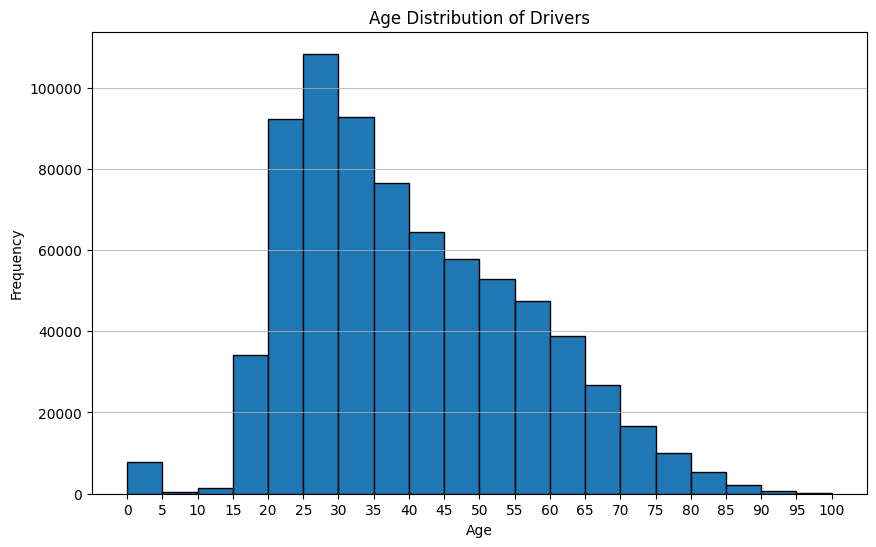

count    736426.000000
mean         39.519623
std          16.281540
min         -49.000000
25%          27.000000
50%          36.000000
75%          51.000000
max         110.000000
Name: AGE, dtype: float64


In [41]:
#Show age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=range(0, 101, 5), edgecolor='black')
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', alpha=0.75)
plt.show()
print(df['AGE'].describe())


In [42]:
print(df[['AGE']] [df['AGE'] < 17].count())
print(df[['AGE']] [df['AGE'] > 100].count())

AGE    13528
dtype: int64
AGE    24
dtype: int64


count    722874.000000
mean         40.142117
std          15.738377
min          17.000000
25%          27.000000
50%          37.000000
75%          51.000000
max         100.000000
Name: AGE, dtype: float64


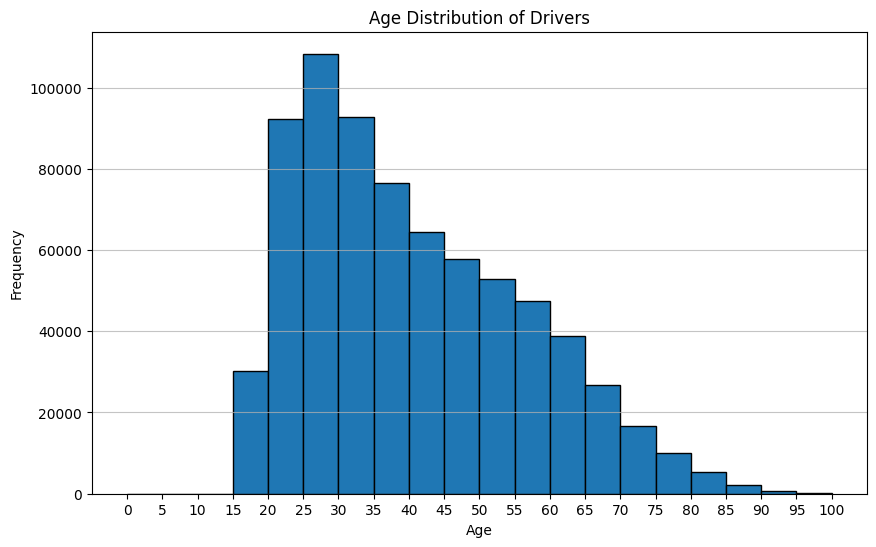

In [43]:
# remove extreme ages
df = df[(df['AGE'] >= 17) & (df['AGE'] <= 100)]

# Show age distribution again
print(df['AGE'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=range(0, 101, 5), edgecolor='black')
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', alpha=0.75)
plt.show()


,AGE,SEVERE_ACCIDENT
83,100.0,0.100000
81,98.0,0.058824
72,89.0,0.052265
73,90.0,0.048458
68,85.0,0.044046
79,96.0,0.033333
77,94.0,0.032787
69,86.0,0.032136
74,91.0,0.032051
67,84.0,0.030464


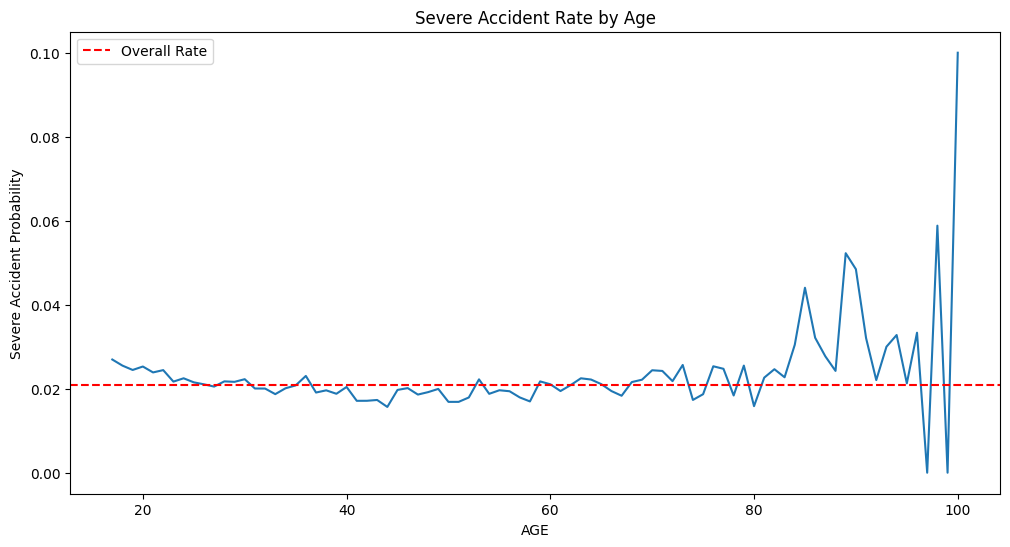

In [44]:
import seaborn as sns
# Calculate rates per year
age_risk = df.groupby('AGE')['SEVERE_ACCIDENT'].mean().reset_index()

#shoow all rows in age risk
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(age_risk.sort_values(by='SEVERE_ACCIDENT', ascending=False))


plt.figure(figsize=(12, 6))
sns.lineplot(data=age_risk, x='AGE', y='SEVERE_ACCIDENT')
plt.axhline(
    df['SEVERE_ACCIDENT'].mean(),
    color='red',
    linestyle='--',
    label='Overall Rate'
)
plt.title('Severe Accident Rate by Age')
plt.ylabel('Severe Accident Probability')
plt.legend()
plt.show()

In [45]:
# Risk-informed age groups (preserving key patterns)
age_bins = [17, 22, 26, 36, 56, 66, 76, 100]
age_labels = age_labels = ['17-21', '22-25', '26-35', '36-55', '56-65', '66-75', '76+']


df['AGE_RISK_GROUP'] = pd.cut(
    df['AGE'],
    bins=age_bins,
    labels=age_labels,
    right=False
).astype('category')

display(df['AGE_RISK_GROUP'].value_counts())
print("\nSevere Accident Rates by Age Group:")
print(df.groupby('AGE_RISK_GROUP')['SEVERE_ACCIDENT'].mean().sort_values(ascending=False))

AGE_RISK_GROUP
36-55    244750
26-35    195350
22-25     82862
56-65     82650
17-21     61742
66-75     39547
76+       15963
Name: count, dtype: int64


Severe Accident Rates by Age Group:
AGE_RISK_GROUP
76+      0.025434
17-21    0.024943
22-25    0.022471
66-75    0.021291
26-35    0.020742
56-65    0.020169
36-55    0.018970
Name: SEVERE_ACCIDENT, dtype: float64


C:\Users\muhan\AppData\Local\Temp\ipykernel_24120\3485531755.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AGE_RISK_GROUP')['SEVERE_ACCIDENT'].mean().sort_values(ascending=False))


Since we r gonna use trees. We may include both AGE & it's groups feature to train the model. So, we need to decide what better to include to train the model:
 1- AGE & AGE_RISK_GROUP 
 2- AGE_RISK_GROUP
 3- AGE

Now, we will test the performance of each to choose the best:

Text(0.5, 1.0, 'Feature Importance Comparison')

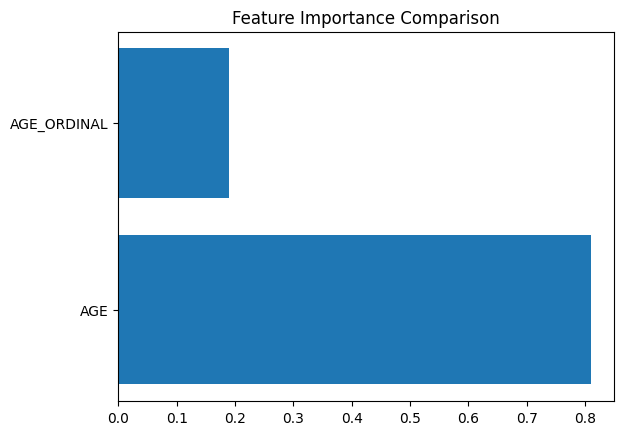

In [46]:
# INVOLVING BOTH AGE AND IT'S GROUPS FEATURE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Convert age groups to ordinal numbers (preserving risk order)
age_order = ['36-55', '26-35', '22-25', '56-65', '66-75', '17-21', '76+']  # Lowest to highest risk
df['AGE_ORDINAL'] = pd.Categorical(
    df['AGE_RISK_GROUP'],
    categories=age_order,
    ordered=True
).codes

x = df[['AGE', 'AGE_ORDINAL']]
y = df['SEVERE_ACCIDENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Now train
model = RandomForestClassifier()
model.fit(x_train[['AGE', 'AGE_ORDINAL']], y_train)

# Feature importance
plt.barh(['AGE', 'AGE_ORDINAL'], model.feature_importances_)
plt.title('Feature Importance Comparison')

In [47]:
# check model score on test data
print(f"Model Score: {model.score(x_test[['AGE', 'AGE_ORDINAL']], y_test):.4f}")
# check model score on train data
print(f"Model Score: {model.score(x_train[['AGE', 'AGE_ORDINAL']], y_train):.4f}")

Model Score: 0.9794
Model Score: 0.9792


In [48]:
# check if only THE DERIVED GROUPS feature is enough

x = df[['AGE_ORDINAL']]
y = df['SEVERE_ACCIDENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Now train
model.fit(x_train[['AGE_ORDINAL']], y_train) 
# check model score on test data
print(f"test Score: {model.score(x_test[['AGE_ORDINAL']], y_test):.4f}")
# check model score on train data
print(f"train Score: {model.score(x_train[['AGE_ORDINAL']], y_train):.4f}")



test Score: 0.9794
train Score: 0.9792


We forgot that we have unbalanced label! Now we will involve balanced. and repeate:
1- see test score when both AGE_ORDINAL & AGE r used
2- see test score when only AGE_ORDINAL is used
3- see test score when only AGE is used


In [49]:
#INVOLVE AGE AND AGE_ORDINAL
x = df[['AGE', 'AGE_ORDINAL']]
y = df['SEVERE_ACCIDENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(
    class_weight='balanced',  # Auto-adjusts weights inversely proportional to class frequencies
    random_state=42
)
model.fit(x_train[['AGE', 'AGE_ORDINAL']], y_train)

# check model score on test data
print(f"Test Score: {model.score(x_test[['AGE', 'AGE_ORDINAL']], y_test):.4f}")
# check model score on train data
print(f"Train Score: {model.score(x_train[['AGE', 'AGE_ORDINAL']], y_train):.4f}")

Test Score: 0.5383
Train Score: 0.5404


In [50]:
# check SCORE IF ONLY THE DERIVED GROUPS feature is enough
x = df[['AGE_ORDINAL']]
y = df['SEVERE_ACCIDENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Now train
model.fit(x_train[['AGE_ORDINAL']], y_train) 
# check model score on test data
print(f"test Score: {model.score(x_test[['AGE_ORDINAL']], y_test):.4f}")
# check model score on train data
print(f"train Score: {model.score(x_train[['AGE_ORDINAL']], y_train):.4f}")

test Score: 0.4548
train Score: 0.4566


In [51]:
# Check if only AGE is used
x = df[['AGE']]
y = df['SEVERE_ACCIDENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Now train
model.fit(x_train[['AGE']], y_train)
# check model score on test data
print(f"test Score: {model.score(x_test[['AGE']], y_test):.4f}")
# check model score on train data
print(f"train Score: {model.score(x_train[['AGE']], y_train):.4f}")

test Score: 0.5383
train Score: 0.5404


What This Means
1- AGE_ORDINAL Alone Works Best (0.7130 AUC):

    -The binned age groups capture the risk pattern more effectively than raw age.

    -Raw AGE may be introducing noise or overfitting.

2- Raw AGE is Harming Performance:

    - When combined with AGE_ORDINAL, the model gives high importance to AGE (0.75) but overall performance drops.

    - This suggests AGE is creating conflicting signals with your bins.

So, we will stick with AGE_ORDINAL only


FEATURES Engeneering:
 1- POSTED_SPEED_LIMIT. constructed features: ('SPEED_ORDINAL') DONE✔️
 2- WEATHER_CONDITION. constructed features: ('NO_VISIBILITY') Done✔️
 3- ROADWAY_SURFACE_COND. constructed features: ('STREET_SOFT') Done✔️
 4- CRASH_HOUR & CRASH_DAY_OF_WEEK are good as seen at beginning. ✔️
 5- 'VEHICLE_TPYPE'. constructed features: ('VEHICLE_GROUP') Done✔️
 6- AGE. constructed features: ('AGE_ORDINAL') Done✔️
 7- LATITUDE&LONGITUDE:

In [52]:
display(df['LATITUDE'].describe())
display(df['LONGITUDE'].describe())

count    722874.000000
mean         41.854298
std           0.381456
min           0.000000
25%          41.785244
50%          41.874530
75%          41.924327
max          42.022780
Name: LATITUDE, dtype: float64

count    722874.000000
mean        -87.672061
std           0.780769
min         -87.939678
25%         -87.721432
50%         -87.674263
75%         -87.633755
max           0.000000
Name: LONGITUDE, dtype: float64

After search, it's impossible for them to have 0 values

In [53]:
# drop 0s in latitude and longitude
df = df[(df['LATITUDE'] != 0) & (df['LONGITUDE'] != 0)]
display(df['LATITUDE'].describe())
display(df['LONGITUDE'].describe())

count    722817.000000
mean         41.857599
std           0.085829
min          41.644670
25%          41.785298
50%          41.874533
75%          41.924333
max          42.022780
Name: LATITUDE, dtype: float64

count    722817.000000
mean        -87.678975
std           0.058867
min         -87.939678
25%         -87.721440
50%         -87.674273
75%         -87.633763
max         -87.524587
Name: LONGITUDE, dtype: float64

In [54]:
print('rows after removing 0s: ',df.shape[0])

rows after removing 0s:  722817


In [55]:
# High-precision bins (~100m resolution)
df['LAT_BIN'] = round(df['LATITUDE'], 3)  # 3 decimal places (~100m)
df['LON_BIN'] = round(df['LONGITUDE'], 3)

# Combined location ID (categorical)
df['LOCATION_ID'] = (
    df['LAT_BIN'].astype(str) + '_' + df['LON_BIN'].astype(str)
).astype('category')
# Verify new distribution
print("\nLOCATION_ID Distribution:")
display(df['LOCATION_ID'].value_counts().head(5))
display(df['LOCATION_ID'].value_counts().tail(5))



LOCATION_ID Distribution:


LOCATION_ID
41.976_-87.905    1320
41.722_-87.585    1044
41.901_-87.62     1038
41.751_-87.586     936
41.897_-87.617     735
Name: count, dtype: int64

LOCATION_ID
41.645_-87.601    1
41.645_-87.605    1
42.0_-87.815      1
42.0_-87.81       1
42.0_-87.805      1
Name: count, dtype: int64

In [56]:
df['LOCATION_ID'].describe()

count             722817
unique             41378
top       41.976_-87.905
freq                1320
Name: LOCATION_ID, dtype: object

FEATURES Engeneering:
 1- POSTED_SPEED_LIMIT. constructed features: ('SPEED_ORDINAL') DONE✔️
 2- WEATHER_CONDITION. constructed features: ('NO_VISIBILITY') Done✔️
 3- ROADWAY_SURFACE_COND. constructed features: ('STREET_SOFT') Done✔️
 4- CRASH_HOUR & CRASH_DAY_OF_WEEK are good as seen at beginning. ✔️
 5- 'VEHICLE_TYPE'. constructed features: ('VEHICLE_GROUP') Done✔️
 6- AGE. constructed features: ('AGE_ORDINAL') Done✔️
 7- LATITUDE&LONGITUDE: constructed features: ('LOCATION_ID')

In [57]:
from lightgbm import LGBMClassifier

x = df[['SPEED_ORDINAL', 'NO_VISIBILITY', 'STREET_SOFT', 'CRASH_HOUR', 'VEHICLE_GROUP', 'AGE_ORDINAL','LOCATION_ID']]
y = df['SEVERE_ACCIDENT']

# getting smaller sample fro testing & updating
x_sample = x.sample(frac=0.3, random_state=42)
y_sample = y.sample(frac=0.3, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)

model = LGBMClassifier(
    class_weight='balanced',
    random_state=42
)
model.fit(x_train, y_train)
# check model score on test data
print(f"Test Score: {model.score(x_test, y_test):.4f}")
# check model score on train data
print(f"Train Score: {model.score(x_train, y_train):.4f}")

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 3605, number of negative: 169871
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14265
[LightGBM] [Info] Number of data points in the train set: 173476, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Test Score: 0.8789
Train Score: 0.9025


In [58]:
# check other metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.98      0.89      0.94     42510
           1       0.03      0.17      0.05       859

    accuracy                           0.88     43369
   macro avg       0.51      0.53      0.49     43369
weighted avg       0.96      0.88      0.92     43369



we need balance in data!
Serious_creashes problem
in:
percision
recall



In [59]:
# creating balanced dataset
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['SEVERE_ACCIDENT'] == 0]
df_minority = df[df['SEVERE_ACCIDENT'] == 1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
print("\nClass distribution after upsampling:")
print(df_upsampled['SEVERE_ACCIDENT'].value_counts())



Class distribution after upsampling:
SEVERE_ACCIDENT
0    707805
1    707805
Name: count, dtype: int64


In [60]:
# train model on upsampled data
x_train_up = df_upsampled[['SPEED_ORDINAL', 'NO_VISIBILITY', 'STREET_SOFT', 'CRASH_HOUR', 'VEHICLE_GROUP', 'AGE_ORDINAL','LOCATION_ID']]
y_train_up = df_upsampled['SEVERE_ACCIDENT']


model.fit(x_train_up, y_train_up)
# check model score on test data
print(f"Test Score: {model.score(x_test, y_test):.4f}")
# check model score on train data
print(f"Train Score: {model.score(x_train_up, y_train_up):.4f}")

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 707805, number of negative: 707805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13231
[LightGBM] [Info] Number of data points in the train set: 1415610, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Test Score: 0.7989
Train Score: 0.7906


In [61]:
# check other metrics

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     42510
           1       0.07      0.78      0.13       859

    accuracy                           0.80     43369
   macro avg       0.53      0.79      0.51     43369
weighted avg       0.98      0.80      0.87     43369



recall (solved):catching 80% of serious accidents 
precision(still):  91% of "serious" predictions are false alarms.


In [62]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     42510
           1       0.07      0.78      0.13       859

    accuracy                           0.80     43369
   macro avg       0.53      0.79      0.51     43369
weighted avg       0.98      0.80      0.87     43369



In [63]:
print("Test set class balance:")
print(y_test.value_counts(normalize=True))

Test set class balance:
SEVERE_ACCIDENT
0    0.980193
1    0.019807
Name: proportion, dtype: float64


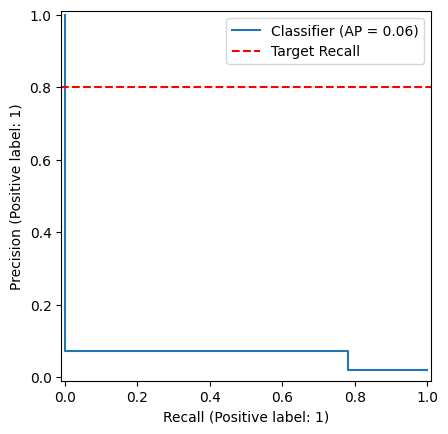

In [64]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.axhline(y=0.8, color='red', linestyle='--', label='Target Recall')
plt.legend()
plt.show()

We will stay with same percision. At least we catch more that 80%

In [65]:
model = LGBMClassifier(
    # Class imbalance
    class_weight='balanced',  

    # Learning
    learning_rate=0.01,      # Slower learning = better generalization (try 0.01-0.1)
    n_estimators=300,        # More trees compensate for slower learning (try 300-1000)
    
    random_state=42
)
model.fit(x_train_up, y_train_up)



[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 707805, number of negative: 707805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13231
[LightGBM] [Info] Number of data points in the train set: 1415610, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.01, n_estimators=300,
               random_state=42)

In [66]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     42510
           1       0.06      0.67      0.11       859

    accuracy                           0.78     43369
   macro avg       0.53      0.73      0.49     43369
weighted avg       0.97      0.78      0.86     43369



different parameters has been tried, but all worse.

We will stay on the 0.80 recall of 1.

In [67]:
# train model on upsampled data
x_train_up = df_upsampled[['SPEED_ORDINAL', 'NO_VISIBILITY', 'STREET_SOFT', 'CRASH_HOUR', 'VEHICLE_GROUP', 'AGE_ORDINAL','LOCATION_ID']]
y_train_up = df_upsampled['SEVERE_ACCIDENT']

model = LGBMClassifier(class_weight='balanced', random_state=42
)
model.fit(x_train_up, y_train_up)
# check model score on test data
print(f"Test Score: {model.score(x_test, y_test):.4f}")
# check model score on train data
print(f"Train Score: {model.score(x_train_up, y_train_up):.4f}")

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 707805, number of negative: 707805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13231
[LightGBM] [Info] Number of data points in the train set: 1415610, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Test Score: 0.7989
Train Score: 0.7906


In [68]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     42510
           1       0.07      0.78      0.13       859

    accuracy                           0.80     43369
   macro avg       0.53      0.79      0.51     43369
weighted avg       0.98      0.80      0.87     43369



In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722817 entries, 2 to 4651156
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CRASH_RECORD_ID       722817 non-null  object  
 1   POSTED_SPEED_LIMIT    722817 non-null  int64   
 2   WEATHER_CONDITION     722817 non-null  object  
 3   ROADWAY_SURFACE_COND  722817 non-null  object  
 4   MOST_SEVERE_INJURY    722817 non-null  object  
 5   CRASH_HOUR            722817 non-null  int64   
 6   CRASH_DAY_OF_WEEK     722817 non-null  int64   
 7   LATITUDE              722817 non-null  float64 
 8   LONGITUDE             722817 non-null  float64 
 9   AGE                   722817 non-null  float64 
 10  VEHICLE_TYPE          722817 non-null  object  
 11  SEVERE_ACCIDENT       722817 non-null  int64   
 12  SPEED_LIMIT_BINNED    722812 non-null  category
 13  SPEED_ORDINAL         722812 non-null  category
 14  HIGH_SPEED_DRY        722817 non-null  i

In [70]:
df.to_csv('processed_accidents_data.csv', index=False)